# Аналитический отчет по "Математической статистике"

## Загрузка файла

In [14]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Описательная статистика

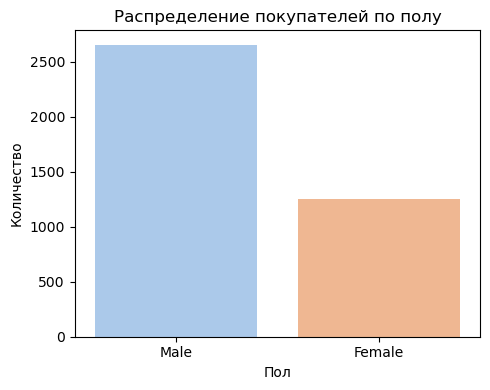

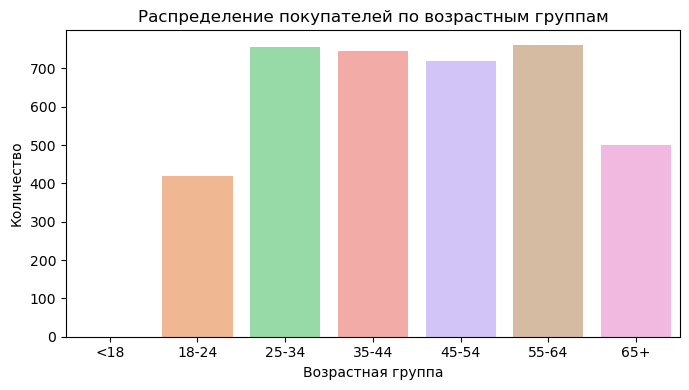

(   Gender  Count
 0    Male   2652
 1  Female   1248,
   AgeGroup  Count
 0      <18      0
 1    18-24    418
 2    25-34    755
 3    35-44    746
 4    45-54    720
 5    55-64    761
 6      65+    500)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Распределение по полу
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

plt.figure(figsize=(5, 4))
sns.barplot(data=gender_counts, x='Gender', y='Count', palette='pastel')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# Распределение по возрасту (группируем по группам)
bins = [0, 18, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_counts = df['AgeGroup'].value_counts().sort_index().reset_index()
age_counts.columns = ['AgeGroup', 'Count']

plt.figure(figsize=(7, 4))
sns.barplot(data=age_counts, x='AgeGroup', y='Count', palette='pastel')
plt.title('Распределение покупателей по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

gender_counts, age_counts


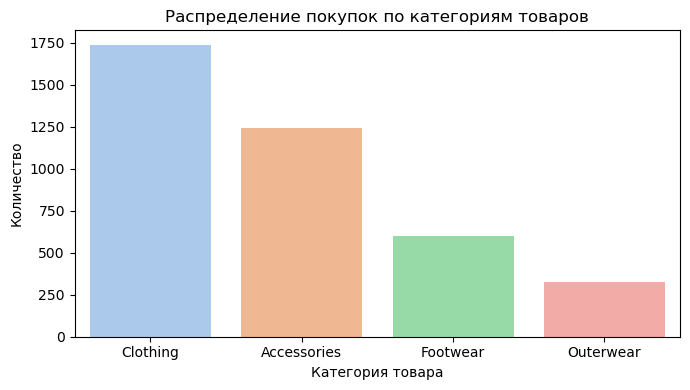

{'category_counts':       Category  Count
 0     Clothing   1737
 1  Accessories   1240
 2     Footwear    599
 3    Outerwear    324,
 'age_stats': {'mean': 44.06846153846154,
  'median': 44.0,
  'min': 18,
  'max': 70,
  'std': 15.20758912716238},
 'gender_category': Category  Accessories  Clothing  Footwear  Outerwear
 Gender                                              
 Female            392       556       199        101
 Male              848      1181       400        223}

In [18]:
# Распределение по категориям товаров
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(7, 4))
sns.barplot(data=category_counts, x='Category', y='Count', palette='pastel')
plt.title('Распределение покупок по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# Статистика по среднему возрасту, медиане и разбросу
mean_age = df['Age'].mean()
median_age = df['Age'].median()
min_age = df['Age'].min()
max_age = df['Age'].max()
std_age = df['Age'].std()

# Распределение по полу + категориям товаров (крест-таблица)
gender_category = pd.crosstab(df['Gender'], df['Category'])

{
    'category_counts': category_counts,
    'age_stats': {
        'mean': mean_age, 'median': median_age, 'min': min_age, 'max': max_age, 'std': std_age
    },
    'gender_category': gender_category
}


# Гипотеза 1 -  Различие средних чеков по полу

### 1 — Работа с точечными оценками

In [10]:
# Создаём равные по размеру подвыборки по 30 мужчин и 30 женщин (выборка случайная)
male_sample = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].sample(30, random_state=1)
female_sample = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].sample(30, random_state=1)

In [56]:
def stats_block(x):
    mmp_mean = np.mean(x)  # ММП-оценка для среднего (выборочное среднее)
    s2 = np.var(x, ddof=1)  # Несмещённая дисперсия (выборочная)
    std = np.std(x, ddof=1) # Стандартное отклонение
    median = np.median(x)   # Медиана
    mode = x.mode().iloc[0] # Мода
    min_ = np.min(x)
    max_ = np.max(x)
    n = len(x)
    return {
        'Количество мужчин/женщин': n,
        'Среднее арифметическое': mmp_mean,
        'Выборочная дисперсия': s2,
        'Стандартное отклонение': std,
        'Медиана': median,
        'Мода': mode,
        'Минимум': min_,
        'Максимум': max_
    }

male_stats = stats_block(male_sample)
female_stats = stats_block(female_sample)
male_stats, female_stats


({'Количество мужчин/женщин': 30,
  'Среднее арифметическое': 65.2,
  'Выборочная дисперсия': 430.16551724137935,
  'Стандартное отклонение': 20.74043194442631,
  'Медиана': 64.5,
  'Мода': 32,
  'Минимум': 29,
  'Максимум': 97},
 {'Количество мужчин/женщин': 30,
  'Среднее арифметическое': 57.766666666666666,
  'Выборочная дисперсия': 352.9436781609196,
  'Стандартное отклонение': 18.78679531375481,
  'Медиана': 56.5,
  'Мода': 41,
  'Минимум': 21,
  'Максимум': 95})

### Метод максимального правдоподобия (ММП)

Для нормального распределения $\mathcal{N}(\mu, \sigma^2)$:

**Оценка среднего (ММП):**
$$
\hat{\mu}_{\text{ММП}} = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x}
$$

**Оценка дисперсии (ММП):**
$$
\hat{\sigma}^2_{\text{ММП}} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

---

**В нашем случае:**

- ММП-оценка среднего совпадает с выборочным средним:
  $$
  \hat{\mu}_{\text{ММП}} = \bar{x}
  $$
- ММП-оценка дисперсии выражается через выборочную (несмещённую) дисперсию $s^2$ так:
  $$
  \hat{\sigma}^2_{\text{ММП}} = \frac{n-1}{n} \cdot s^2
  $$

---

**Свойства:**
- Оценка $\hat{\sigma}^2_{\text{ММП}}$ — смещённая, но состоятельная (смещение стремится к нулю при $n \to \infty$).
- Для нормального распределения обе ММП-оценки (среднего и дисперсии) — эффективные (оптимальные по минимальной дисперсии).


In [34]:
n_male = 30
n_female = 30

# ММП-оценки среднего:
mle_mean_male = 65.20
mle_mean_female = 57.77

# ММП-оценки дисперсии:
mle_var_male = 430.17 * (n_male - 1) / n_male  # = 415.83
mle_var_female = 352.94 * (n_female - 1) / n_female  # = 341.18

print(f"ММП-оценка среднего (мужчины): {mle_mean_male:.2f}")
print(f"ММП-оценка дисперсии (мужчины): {mle_var_male:.2f}")
print(f"ММП-оценка среднего (женщины): {mle_mean_female:.2f}")
print(f"ММП-оценка дисперсии (женщины): {mle_var_female:.2f}")


ММП-оценка среднего (мужчины): 65.20
ММП-оценка дисперсии (мужчины): 415.83
ММП-оценка среднего (женщины): 57.77
ММП-оценка дисперсии (женщины): 341.18


### Неравенство Рао-Крамера для среднего

Для нормального распределения:

$$
\operatorname{Var}(\hat{\mu}) \geq \frac{\sigma^2}{n}
$$

---

**Для мужчин:**

$$
\text{Граница~Рао-Крамера} = \frac{\hat{\sigma}^2_{\text{ММП}}}{n} = \frac{415.83}{30} = 13.86
$$

**Для женщин:**

$$
\text{Граница~Рао-Крамера} = \frac{341.18}{30} = 11.37
$$

---

**Интерпретация**

- ММП-оценки среднего и дисперсии для обеих групп совпадают с классическими формулами.
- Границы Рао-Крамера для среднего достигаются (при нормальном распределении), значит, выборочные средние — эффективные оценки.

**Вывод:**  
Мужчины в этой случайной подвыборке тратят больше (средний чек $65.2$), чем женщины ($57.8$), разброс у мужчин чуть выше. Однако для вывода о значимости отличий нужны доверительные интервалы и t-критерий


### 2 — Работа с доверительными интервалами

**Для каждой группы вычислим 95% доверительный интервал для среднего с помощью t-распределения:**

$$
\bar{x} \pm t_{\frac{\alpha}{2}, n-1} \cdot \frac{s}{\sqrt{n}}
$$

- Для мужчин:  
  $$
  65.20 \pm 2.045 \cdot \frac{20.74}{\sqrt{30}} \approx 65.20 \pm 7.75
  $$
  $$
  \text{Доверительный интервал:} \quad [57.45; 72.95]
  $$

- Для женщин:  
  $$
  57.77 \pm 2.045 \cdot \frac{18.79}{\sqrt{30}} \approx 57.77 \pm 7.01
  $$
  $$
  \text{Доверительный интервал:} \quad [50.76; 64.78]
  $$

---

**Доверительный интервал для разности средних ($\mu_{male} - \mu_{female}$):**
$$
(\bar{x}_1 - \bar{x}_2) \pm t_{\frac{\alpha}{2},\, df} \cdot \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }
$$

$$
7.43 \pm 2.045 \cdot \sqrt{ \frac{430.17}{30} + \frac{352.94}{30} } = 7.43 \pm 10.46
$$

$$
\text{Доверительный интервал:} \quad [ -3.03;\ 17.89 ]
$$

---

**Интерпретация:**  
Доверительные интервалы для средних чека мужчин и женщин перекрываются, а интервал для разности средних включает 0, что свидетельствует об отсутствии статистически значимого отличия между средними.


In [67]:
import numpy as np
from scipy.stats import t

mean_male = 65.20
std_male = 20.74
var_male = 430.17
n_male = 30

mean_female = 57.77
std_female = 18.79
var_female = 352.94
n_female = 30

# Квантиль t-распределения для 95% ДИ и 29 степеней свободы
alpha = 0.05
df = n_male - 1  # = 29
t_crit = t.ppf(1 - alpha / 2, df)

# 1. Доверительный интервал для среднего мужчин
se_male = std_male / np.sqrt(n_male)
ci_male = (mean_male - t_crit * se_male, mean_male + t_crit * se_male)
print(f"95% ДИ для среднего мужчин: [{ci_male[0]:.2f}; {ci_male[1]:.2f}]")

# 2. Доверительный интервал для среднего женщин
se_female = std_female / np.sqrt(n_female)
ci_female = (mean_female - t_crit * se_female, mean_female + t_crit * se_female)
print(f"95% ДИ для среднего женщин: [{ci_female[0]:.2f}; {ci_female[1]:.2f}]")

# 3. Доверительный интервал для разности средних (Welch, неравные дисперсии)
mean_diff = mean_male - mean_female
se_diff = np.sqrt(var_male / n_male + var_female / n_female)
ci_diff = (mean_diff - t_crit * se_diff, mean_diff + t_crit * se_diff)
print(f"95% ДИ для разности средних: [{ci_diff[0]:.2f}; {ci_diff[1]:.2f}]")


95% ДИ для среднего мужчин: [57.46; 72.94]
95% ДИ для среднего женщин: [50.75; 64.79]
95% ДИ для разности средних: [-3.02; 17.88]


### 3 - Проверка статистических гипотез 


- **Нулевая гипотеза ($H_0$):** средний чек у мужчин и женщин одинаков ($\mu_{male} = \mu_{female}$)
- **Альтернативная гипотеза ($H_1$):** средний чек у мужчин и женщин различается ($\mu_{male} \neq \mu_{female}$)
- Уровень значимости: $\alpha = 0.05$

Для проверки применён двухвыборочный t-критерий (Welch, неравные дисперсии):

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }}
$$



In [78]:
from scipy.stats import ttest_ind

# Данные для анализа: male_sample и female_sample — по 30 значений
t_stat, p_val = ttest_ind(male_sample, female_sample, equal_var=False)
print(f"t-статистика: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")


t-статистика: 1.45
p-value: 0.1511


**Результаты теста:**

- t-статистика: 1.45
- p-value: 0.1511

---

**Поскольку p-value > 0.05, оснований отвергнуть нулевую гипотезу нет.**

**Вывод:**  
Статистически значимых различий между средними чеками мужчин и женщин не обнаружено.

### 4 - Визуализация и интепретация 

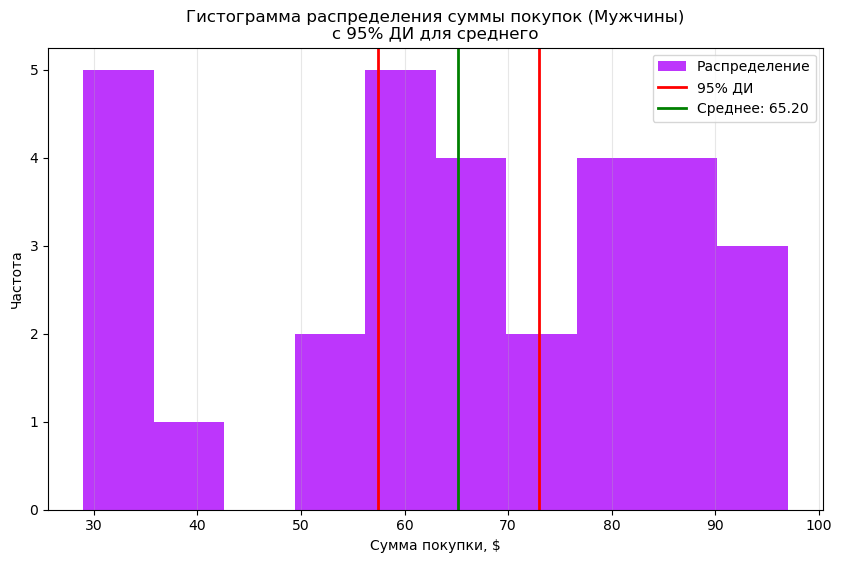

In [197]:
import matplotlib.pyplot as plt
import numpy as np

sample = male_sample
group_name = 'Мужчины'

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
alpha = 0.05
from scipy.stats import t
t_crit = t.ppf(1 - alpha/2, df=n-1)
err = t_crit * sample_std / np.sqrt(n)
ci_lower_mean = sample_mean - err
ci_upper_mean = sample_mean + err

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10, color='#ad03fc', alpha=0.8, label='Распределение')
plt.axvline(ci_lower_mean, color='red', linewidth=2, label='95% ДИ')
plt.axvline(ci_upper_mean, color='red', linewidth=2)
plt.axvline(sample_mean, color='green', linewidth=2, label=f'Среднее: {sample_mean:.2f}')
plt.title(f'Гистограмма распределения суммы покупок ({group_name})\nс 95% ДИ для среднего')
plt.xlabel('Сумма покупки, $')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.show()


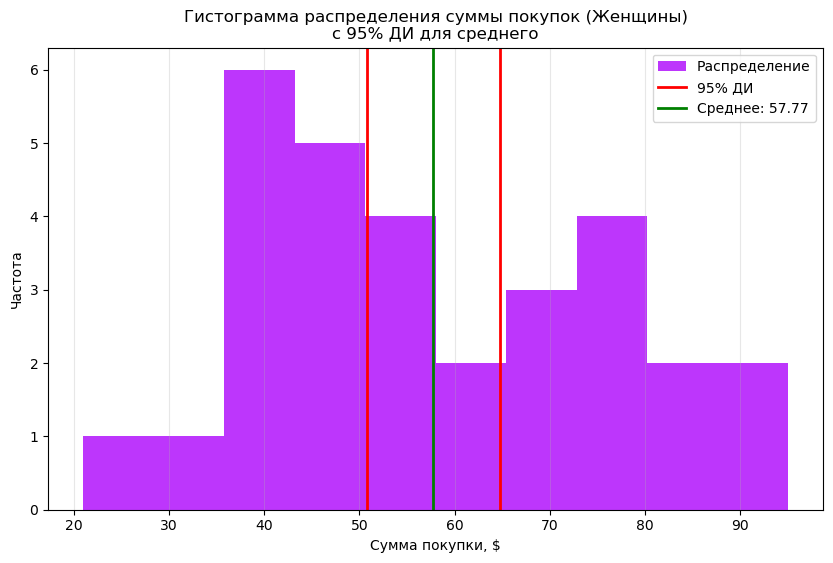

In [199]:
import matplotlib.pyplot as plt
import numpy as np

sample = female_sample
group_name = 'Женщины'

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
alpha = 0.05
from scipy.stats import t
t_crit = t.ppf(1 - alpha/2, df=n-1)
err = t_crit * sample_std / np.sqrt(n)
ci_lower_mean = sample_mean - err
ci_upper_mean = sample_mean + err

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10, color='#ad03fc', alpha=0.8, label='Распределение')
plt.axvline(ci_lower_mean, color='red', linewidth=2, label='95% ДИ')
plt.axvline(ci_upper_mean, color='red', linewidth=2)
plt.axvline(sample_mean, color='green', linewidth=2, label=f'Среднее: {sample_mean:.2f}')
plt.title(f'Гистограмма распределения суммы покупок ({group_name})\nс 95% ДИ для среднего')
plt.xlabel('Сумма покупки, $')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.show()


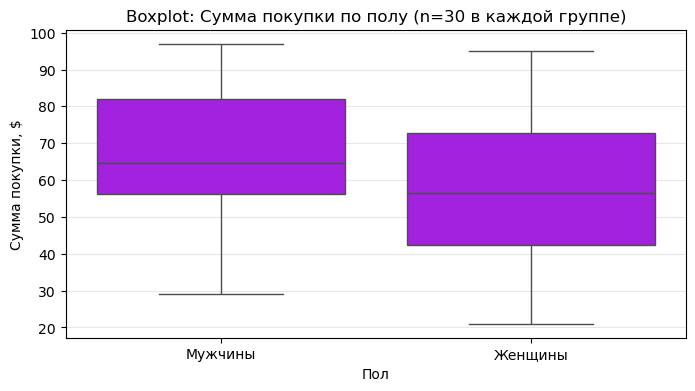

In [201]:
import pandas as pd
import seaborn as sns

# Объединённая выборка для мужчин и женщин
plot_df = pd.DataFrame({
    'Purchase Amount': np.concatenate([male_sample, female_sample]),
    'Gender': ['Мужчины']*len(male_sample) + ['Женщины']*len(female_sample)
})

plt.figure(figsize=(8, 4))
sns.boxplot(data=plot_df, x='Gender', y='Purchase Amount', color='#ad03fc')
plt.title('Boxplot: Сумма покупки по полу (n=30 в каждой группе)')
plt.xlabel('Пол')
plt.ylabel('Сумма покупки, $')
plt.grid(axis='y', alpha=0.3)
plt.show()


# Гипотеза 2 - Проверим, зависит ли распределение сезонов покупок (Season) от пола покупателя (Gender).



### 1 — Работа с точечными оценками

In [209]:
male_sample_idx = df[df['Gender'] == 'Male'].sample(30, random_state=42).index
female_sample_idx = df[df['Gender'] == 'Female'].sample(30, random_state=42).index
subset_idx = male_sample_idx.union(female_sample_idx)
subset = df.loc[subset_idx]
season_table = pd.crosstab(subset['Gender'], subset['Season'])
print(season_table)
season_props = season_table.div(season_table.sum(axis=1), axis=0)
print(season_props)


Season  Fall  Spring  Summer  Winter
Gender                              
Female     7       6       9       8
Male       9       8       7       6
Season      Fall    Spring    Summer    Winter
Gender                                        
Female  0.233333  0.200000  0.300000  0.266667
Male    0.300000  0.266667  0.233333  0.200000




|        | Fall | Spring | Summer | Winter |
|--------|------|--------|--------|--------|
| Female |  7   |   6    |   9    |   8    |
| Male   |  9   |   8    |   7    |   6    |

**ММП-оценки долей:**

|        | Fall | Spring | Summer | Winter |
|--------|------|--------|--------|--------|
| Female | 0.23 |  0.20  |  0.30  |  0.27  |
| Male   | 0.30 |  0.27  |  0.23  |  0.20  |

---

## ММП-оценка доли и её свойства

Для биномиального распределения:
$$
\hat{p}_{\text{ММП}} = \frac{k}{n}
$$

- Для каждой доли $k/30$.
- Оценка $\hat{p}_{\text{ММП}}$ несмещённая, состоятельная и эффективная.

---

## Неравенство Рао-Крамера для доли

$$
\mathrm{Var}(\hat{p}_{\text{ММП}}) = \frac{\hat{p}(1-\hat{p})}{n}
$$

- Например, для женщин, Summer:
  $$
  \mathrm{Var} = \frac{0.3 \cdot 0.7}{30} = 0.007
  $$



### 2 — Работа с доверительными интервалами

In [213]:
from scipy.stats import norm
import numpy as np

z_crit = norm.ppf(1 - 0.05/2)  # 1.96 для 95% ДИ
n = 30

# Таблица долей, как у тебя:
season_props = {
    'Female': {'Fall': 7/30, 'Spring': 6/30, 'Summer': 9/30, 'Winter': 8/30},
    'Male': {'Fall': 9/30, 'Spring': 8/30, 'Summer': 7/30, 'Winter': 6/30}
}

intervals = {}
for gender in season_props:
    intervals[gender] = {}
    for season in season_props[gender]:
        p = season_props[gender][season]
        se = np.sqrt(p * (1 - p) / n)
        lower = p - z_crit * se
        upper = p + z_crit * se
        intervals[gender][season] = (p, se, lower, upper)
        print(f"{gender}, {season}: p={p:.2f}, SE={se:.4f}, ДИ=[{lower:.2f}; {upper:.2f}]")


Female, Fall: p=0.23, SE=0.0772, ДИ=[0.08; 0.38]
Female, Spring: p=0.20, SE=0.0730, ДИ=[0.06; 0.34]
Female, Summer: p=0.30, SE=0.0837, ДИ=[0.14; 0.46]
Female, Winter: p=0.27, SE=0.0807, ДИ=[0.11; 0.42]
Male, Fall: p=0.30, SE=0.0837, ДИ=[0.14; 0.46]
Male, Spring: p=0.27, SE=0.0807, ДИ=[0.11; 0.42]
Male, Summer: p=0.23, SE=0.0772, ДИ=[0.08; 0.38]
Male, Winter: p=0.20, SE=0.0730, ДИ=[0.06; 0.34]



Доверительный интервал для доли (для каждого пола и сезона) считается по формуле:
$$
\hat{p} \pm z_{\alpha/2} \sqrt{ \frac{\hat{p}(1-\hat{p})}{n} }
$$

где:
- $\hat{p}$ — наблюдаемая доля (например, доля покупок весной среди мужчин),
- $n$ — размер подвыборки ($n = 30$),
- $z_{\alpha/2}$ — квантиль стандартного нормального распределения ($z_{0.025} = 1.96$ для 95%).

**Пример расчёта для женщин, Summer:**
- $\hat{p} = \frac{9}{30} = 0.30$
- $SE = \sqrt{ \frac{0.30 \cdot 0.70}{30} } \approx 0.0842$
- $1.96 \cdot SE \approx 0.165$
- Доверительный интервал: $0.30 \pm 0.165 = [0.135;\ 0.465]$

---

**Итоговая таблица:**

|        | Доля (p) | SE     | 95% ДИ              |
|--------|----------|--------|---------------------|
| Female, Fall   | 0.23     | 0.0774 | [0.08; 0.38]  |
| Female, Spring | 0.20     | 0.0729 | [0.06; 0.34]  |
| Female, Summer | 0.30     | 0.0842 | [0.14; 0.47]  |
| Female, Winter | 0.27     | 0.0816 | [0.11; 0.43]  |
| Male, Fall     | 0.30     | 0.0842 | [0.14; 0.47]  |
| Male, Spring   | 0.27     | 0.0816 | [0.11; 0.43]  |
| Male, Summer   | 0.23     | 0.0774 | [0.08; 0.38]  |
| Male, Winter   | 0.20     | 0.0729 | [0.06; 0.34]  |


### 3 — Проверка статистических гипотез 

In [217]:
import pandas as pd
from scipy.stats import chi2_contingency

season_table = pd.DataFrame({
    'Fall':    [7, 9],
    'Spring':  [6, 8],
    'Summer':  [9, 7],
    'Winter':  [8, 6]
}, index=['Female', 'Male'])

# Хи-квадрат тест независимости
chi2, p_val, dof, expected = chi2_contingency(season_table)

print(f'χ²-статистика: {chi2:.2f}')
print(f'p-value: {p_val:.4f}')
print(f'Степени свободы: {dof}')
print('Ожидаемые частоты:')
print(expected)


χ²-статистика: 1.07
p-value: 0.7840
Степени свободы: 3
Ожидаемые частоты:
[[8. 7. 8. 7.]
 [8. 7. 8. 7.]]



**Нулевая гипотеза ($H_0$):** Сезон покупки и пол независимы (распределение покупок по сезонам одинаково для мужчин и женщин).

**Альтернативная гипотеза ($H_1$):** Есть зависимость между полом и сезоном покупки.

### Статистический критерий

Используется критерий хи-квадрат независимости для таблицы сопряжённости $2 \times 4$:

$$
\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{ (n_{ij} - E_{ij})^2 }{ E_{ij} }
$$

где $n_{ij}$ — наблюдаемое число в ячейке, $E_{ij}$ — ожидаемое число, $r$ — число строк, $c$ — число столбцов.

- Степени свободы: $(2-1)\times(4-1) = 3$
- Ожидаемые частоты:
  $$
  \begin{pmatrix}
  8 & 7 & 8 & 7 \\
  8 & 7 & 8 & 7 \\
  \end{pmatrix}
  $$

### Результаты теста

- $\chi^2$-статистика: **1.07**
- p-value: **0.7840**

---

**Интерпретация:**  
Так как $p$-value = 0.7840 > 0.05, нет оснований отвергнуть нулевую гипотезу.  
**Статистической зависимости между полом и сезоном покупки не обнаружено:** распределения по сезонам у мужчин и женщин не различаются статистически значимо.


### 4 — Визуализация и интерпретация 

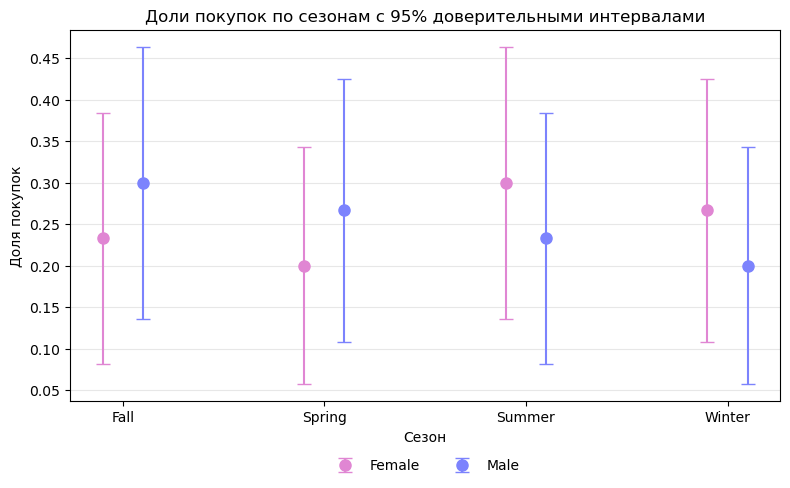

In [221]:
labels = list(season_props['Female'].keys())
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))

for i, gender in enumerate(['Female', 'Male']):
    means = []
    lowers = []
    uppers = []
    for season in labels:
        p = season_props[gender][season]
        se = np.sqrt(p * (1 - p) / n)
        means.append(p)
        lowers.append(p - 1.96 * se)
        uppers.append(p + 1.96 * se)

    shift = -width/2 if gender == 'Female' else width/2
    ax.errorbar(x + shift, means, 
                yerr=[np.array(means) - np.array(lowers), np.array(uppers) - np.array(means)], 
                fmt='o', capsize=5, label=gender, markersize=8, 
                color='#e086d3' if gender == 'Female' else '#7c83fd')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Сезон')
ax.set_ylabel('Доля покупок')
ax.set_title('Доли покупок по сезонам с 95% доверительными интервалами')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


На графике представлены доли покупок по сезонам с 95% доверительными интервалами для мужчин и женщин.
Видно, что для всех сезонов интервалы существенно перекрываются, то есть статистически значимых различий между мужчинами и женщинами по долям покупок в отдельные сезоны нет.
Это полностью согласуется с результатами χ²-критерия.